# Analysis of national vs. local domains

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

In [2]:
df_category_grouped_class = pd.read_csv("../data/house_analysis/domain_rank_ishome_category_counts.csv")

In [3]:
# group domain, rank, and classification.
cat_class_rank_homecheck_counts = df_category_grouped_class.groupby(['category', 'classification', 'cmpt_rank', 'is_home_district'], dropna=False, as_index=False)['counts'].sum()

In [17]:
total_cnt = cat_class_rank_homecheck_counts['counts'].sum()

In [18]:
total_cnt

np.int64(633984769)

## Category counts

In [4]:
category_counts = cat_class_rank_homecheck_counts.groupby(['category'], dropna=False, as_index=False).count()

In [5]:
category = cat_class_rank_homecheck_counts.groupby(['category'], dropna=False, as_index=False)['counts'].sum()

In [19]:
category['proportion'] = category['counts']/total_cnt

In [20]:
category

,category,counts,proportion
0,campaign_personal,36514498,0.057595
1,education,3367061,0.005311
2,gov,110713956,0.174632
3,news,234327716,0.369611
4,other_third_party,164389400,0.259296
5,social,84555559,0.133372
6,NaN,116579,0.000184


<Axes: xlabel='category'>

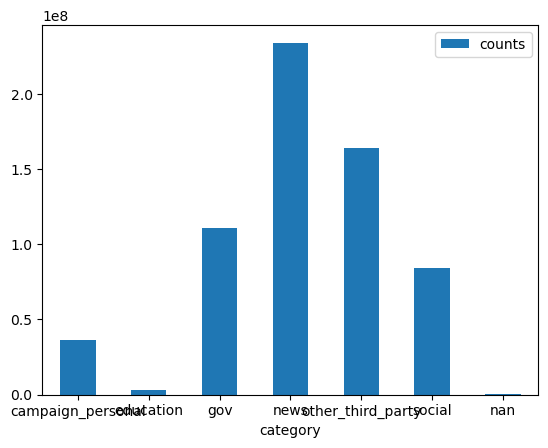

In [7]:
category.plot.bar(x='category', y='counts', rot=0)

# Analysis of news

In [8]:
def check_is_news(col):
    if col == "news":
        return True
    else:
        return False

In [9]:
df_category_grouped_class['is_news'] = df_category_grouped_class['category'].apply(check_is_news)

In [10]:
df_category_grouped_class = df_category_grouped_class.drop_duplicates()

## what proportion are local

### General local vs. national domain

In [13]:
total_class_grouped = df_category_grouped_class.groupby(['classification'], dropna=False, as_index=False)['counts'].sum()

In [15]:
total_class_grouped['rate']=total_class_grouped['counts']/total_cnt

In [16]:
total_class_grouped

,classification,counts,rate
0,local,161412631,0.254600
1,national,80505340,0.126983
2,no_news,312564749,0.493016
3,other news,8359061,0.013185
4,NaN,71142988,0.112216


### Local vs. national news

In [22]:
news_only = df_category_grouped_class[df_category_grouped_class['is_news']==True]

In [23]:
news_total = news_only['counts'].sum()

In [24]:
class_grouped = news_only.groupby(['classification'], dropna=False, as_index=False)['counts'].sum()

In [25]:
class_grouped['rate'] = class_grouped['counts']/news_total

In [26]:
class_grouped

,classification,counts,rate
0,local,131312908,0.560381
1,national,76405444,0.326062
2,no_news,613436,0.002618
3,other news,8359061,0.035673
4,NaN,17636867,0.075266


## rank of non_news, local, and national

In [27]:
def label_non_local_national(row):
    if not row['is_news']:
        return 'no_news'
    else:
        return row['classification']

In [28]:
df_category_grouped_class['label'] = df_category_grouped_class.apply(label_non_local_national, axis=1)

In [29]:
label_grouped = df_category_grouped_class.groupby(['label', 'cmpt_rank'], dropna=True, as_index=False)['counts'].sum()

In [30]:
label_grouped_matrix = label_grouped.pivot_table(index='label', columns='cmpt_rank', values='counts')

In [31]:
# Calculate the sum of each row
label_grouped_matrix['row_sum'] = label_grouped_matrix.sum(axis=1)

# Sort the DataFrame by the sum of each row
label_grouped_matrix_sorted = label_grouped_matrix.sort_values(by='row_sum', ascending=False)

# Drop the 'row_sum' column for heatmap
label_grouped_matrix_sorted = label_grouped_matrix_sorted.drop(columns='row_sum')

In [32]:
label_grouped_matrix_sorted_norm = label_grouped_matrix_sorted.div(label_grouped_matrix_sorted.sum(axis=1), axis=0)

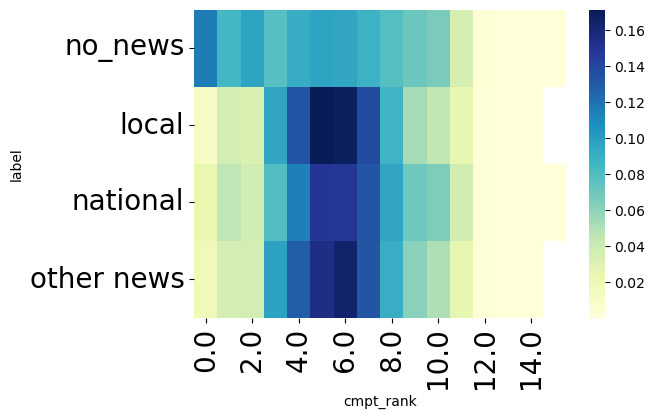

In [33]:
fig, ax = plt.subplots(figsize=(6,4)); 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(label_grouped_matrix_sorted_norm , cmap='YlGnBu', annot=False, fmt='0.0f')
plt.savefig("../data/plots/domain_label_rank_norm.png", bbox_inches='tight', dpi=200) 
plt.show()

## local vs. other place

In [34]:
local = df_category_grouped_class[df_category_grouped_class['is_home_district']==True]

In [39]:
local_news_only = local[local['is_news']==True]

In [40]:
local_news_total = local_news_only['counts'].sum()

In [41]:
local_class_grouped = local_news_only.groupby(['classification'], dropna=False, as_index=False)['counts'].sum()

In [42]:
local_class_grouped['rate'] = local_class_grouped['counts']/local_news_total

In [43]:
local_class_grouped

,classification,counts,rate
0,local,291866,0.569458
1,national,162482,0.317018
2,no_news,1385,0.002702
3,other news,18219,0.035547
4,NaN,38581,0.075275


In [44]:
other = df_category_grouped_class[df_category_grouped_class['is_home_district']==False]

In [47]:
other_news_only = other[other['is_news']==True]

In [48]:
other_news_total = other_news_only['counts'].sum()

In [49]:
other_class_grouped = other_news_only.groupby(['classification'], dropna=False, as_index=False)['counts'].sum()

In [50]:
other_class_grouped['rate'] = other_class_grouped['counts']/other_news_total

In [51]:
other_class_grouped

,classification,counts,rate
0,local,131021042,0.560362
1,national,76242962,0.326082
2,no_news,612051,0.002618
3,other news,8340842,0.035673
4,NaN,17598286,0.075266
